## [Practic 4-1 : State simulation]

A constant velocity discrete model is can be represented as:
l_t+1 = l_t + dT * v_t
v_t+1 = v_t

dT = 0.1, initial velocity v_init = 3m/s, initial range l_init = 1m

Please simulate the 𝑙𝑡 , 𝑣𝑡 from time 𝑡 = 0 to 𝑡 = 50. Plot the simulation (x-axis is time and y-axes are 𝑙𝑡 , 𝑣𝑡 . Submit the figure for the simulation.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
dT = 0.1        # s
v_init = 3.0    # m/s
l_init = 1.0    # m
time_end = 50.0 # s
time_steps = int(time_end / dT) + 1

In [24]:
l_t = np.zeros(time_steps)
v_t = np.zeros(time_steps)
time = np.zeros(time_steps)

# State transition matrix
A = np.array([
    [1, dT],
    [0, 1]
])

# State vector at time t
state_t = np.array([
    [l_t],
    [v_t]
])

for t in range(0, time_steps):
    if t == 0:
        l_t[t] = l_init
        v_t[t] = v_init
    else:
        # compute next state from previous scalar states to avoid shape mismatches
        prev_state = np.array([l_t[t-1], v_t[t-1]])
        state_t = A @ prev_state
        l_t[t] = state_t[0]
        v_t[t] = state_t[1]
    time[t] = t * dT

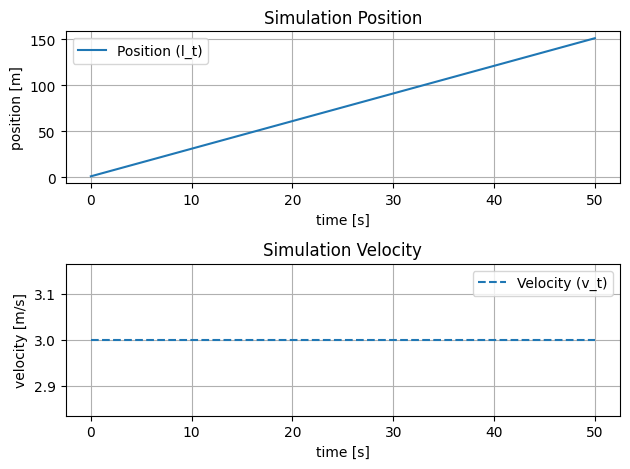

In [25]:
# plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(time, l_t, label='Position (l_t)')
plt.xlabel('time [s]')
plt.ylabel('position [m]')
plt.title('Simulation Position')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, v_t, label='Velocity (v_t)', linestyle='--')
plt.xlabel('time [s]')
plt.ylabel('velocity [m/s]')
plt.title('Simulation Velocity')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## [Practice 4-2 : Measurement simulation]
Please simulate 𝑦𝑡 , which is a range sensor simulation data for the previous simulation. The standard deviation of the sensor noise is one meter. Plot the simulation results.

In [28]:
y_t = np.zeros(time_steps)
sensor_std = 1.0  # standard deviation of sensor noise

for t in range(time_steps):
    noise = np.random.normal(0, sensor_std)
    y_t[t] = np.array([1, 0]) @ np.array([l_t[t], v_t[t]]) + noise

Text(0.5, 1.0, 'Measurement Position from original and Measurement Position from noise')

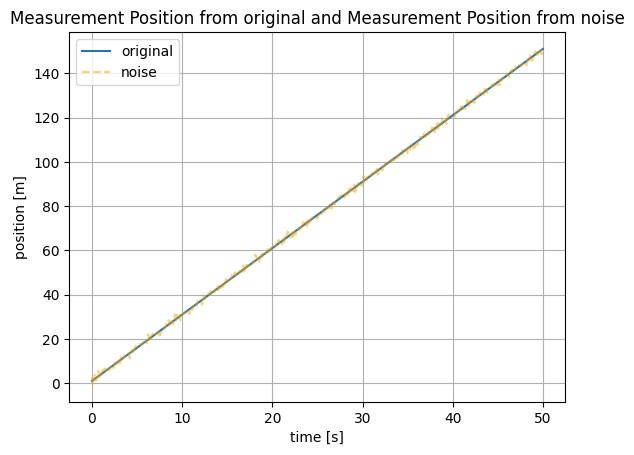

In [35]:
plt.plot(time, l_t, label='original')
plt.plot(time, y_t, label='noise', linestyle='--', color='orange', alpha=0.5)
plt.xlabel('time [s]')
plt.ylabel('position [m]')
plt.legend()
plt.grid()
plt.title('Measurement Position from original and Measurement Position from noise')

## [Practice 4-3 : State estimation]

Estimate l_t, v_t and covariance matrix P using Kalman filter for the following cases:

```
Case 1: Q = [[0.1, 0  ],    R = 0.5
             [0,   0.1]]

Case 2: Q = [[3, 0],    R = 3
             [0, 3]]

Case 3: Tuning the optimal Q, R

Case 4: x_0 = [[0],    P_0 = [[10000, 0    ],
               [0]]           [0,     10000]]

Case 5: x_0 = [[1],    P_0 = [[0, 0],
               [3]]           [0, 0]]
```
Notes:
- l_t: position
- v_t: velocity
- Q: process noise covariance matrix
- R: measurement noise covariance
- x_0: initial state [position, velocity]
- P_0: initial state covariance matrix

In [67]:
# Case 1
Q_case1 = np.array([
    [0.1, 0],
    [0, 0.1]
])

R_case1 = np.array([[0.5]])

# Case 2
Q_case2 = np.array([
    [3.0, 0],
    [0, 3.0]
])
R_case2 = np.array([[3.0]])

# Case 3 - tuning the optimal Q, R
Q_case3 = np.array([
    [0.001, 0],
    [0, 0.001]
])
R_case3 = np.array([[1.0]])

# Case 4
x_init_case4 = np.array([[0], [0]])  # initial state estimate
P_init_case4 = np.array([
    [10000, 0],
    [0, 10000]
])  # initial covariance estimate 

# Case 5
x_init_case5 = np.array([[1], [3]])  # initial state estimate
P_init_case5 = np.array([
    [0, 0],
    [0, 0]
])  # initial covariance estimate

### [Practice 4-3-1]
Plot the estimated state and the error between estimated state and true value in three
cases (x-axis is time and y-axes are 𝑙𝑡 , 𝑣𝑡 ) for each case. Submit the figures for the estimation.

### [Practice 4-3-2]
Get the RMSE between estimated state and true value for each case

### [Practice 4-3-3]
Plot the 𝑃 in three cases (x-axis is time and y-axes are 𝑃00 ~𝑃11 ) for each case. Submit
the figure for the 𝑃.

/tmp/ipykernel_43490/2402220133.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  l_estimates[t] = x_est[0]
/tmp/ipykernel_43490/2402220133.py:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_estimates[t] = x_est[1]


Case 1 - RMSE Position: 0.4906 m, RMSE Velocity: 0.3967 m/s


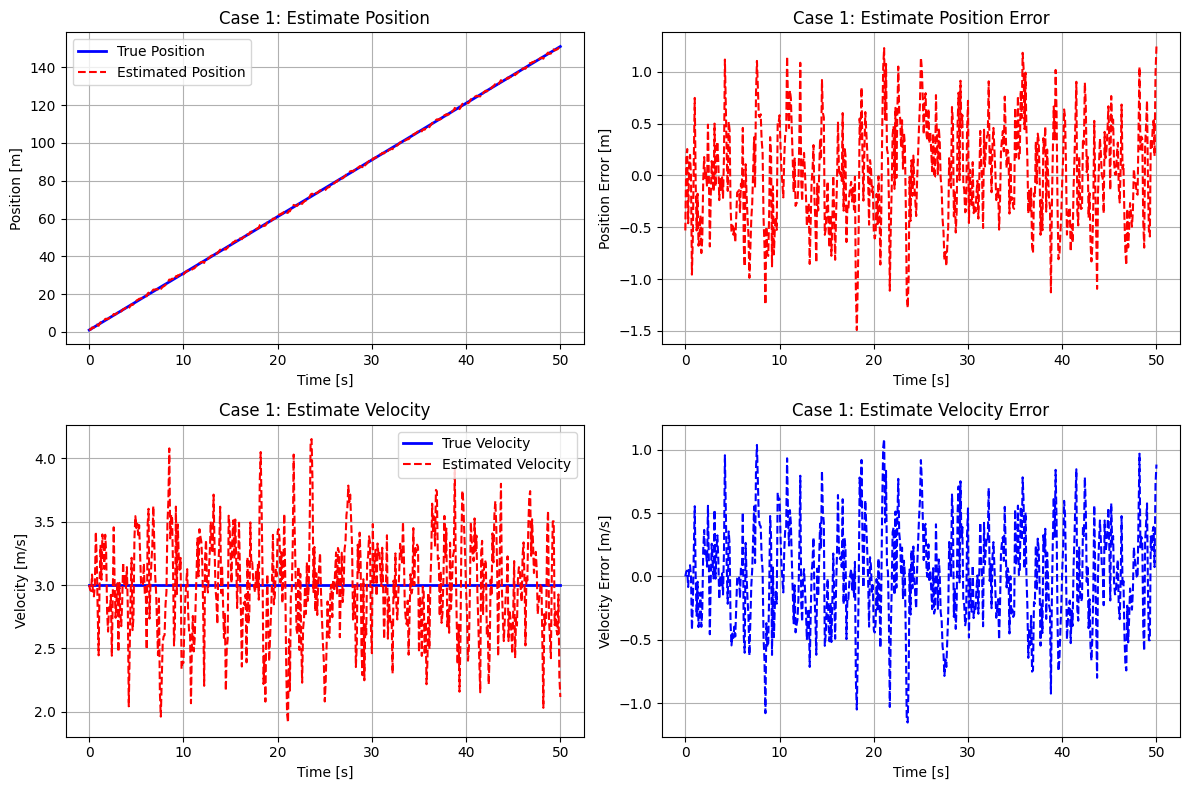

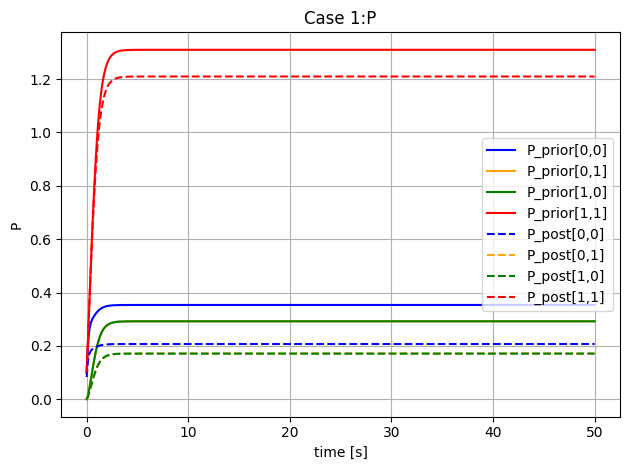

Case 2 - RMSE Position: 0.6675 m, RMSE Velocity: 0.6001 m/s


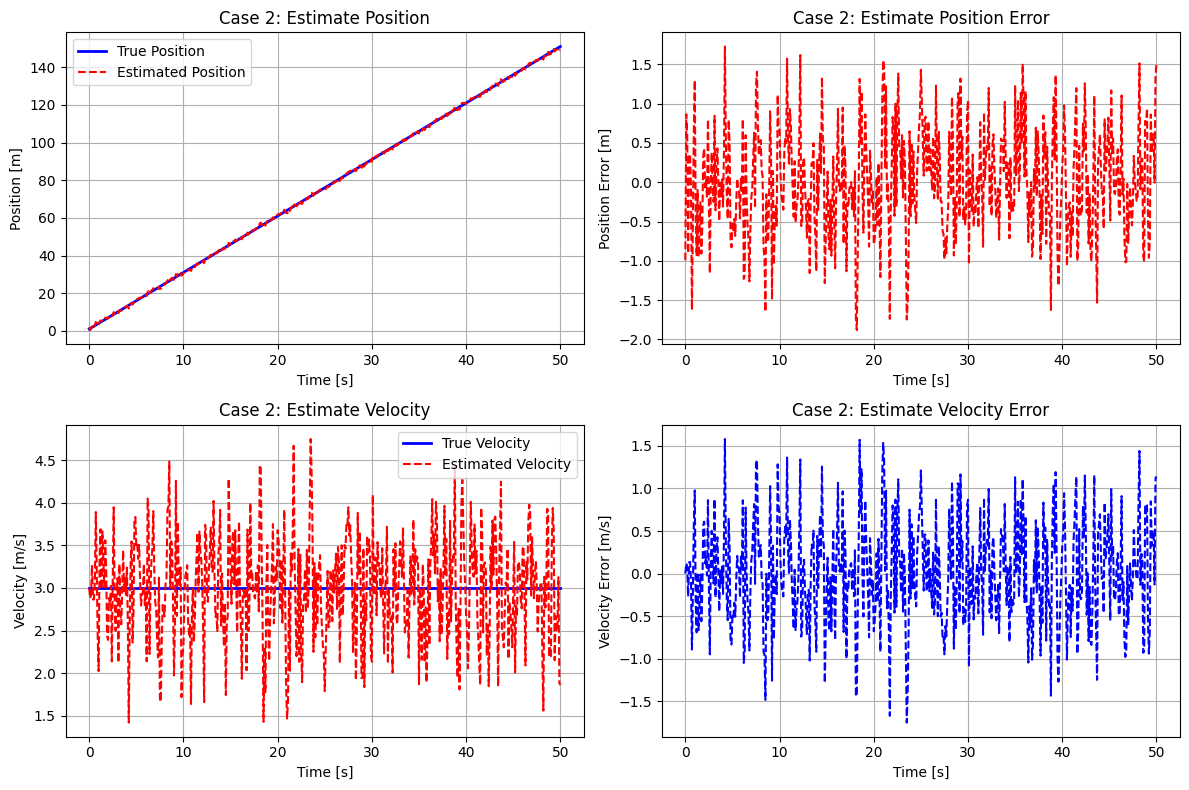

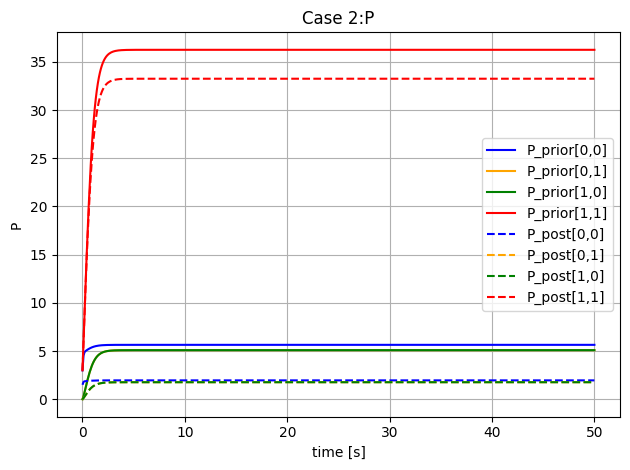

Case 3 - RMSE Position: 0.1907 m, RMSE Velocity: 0.0611 m/s


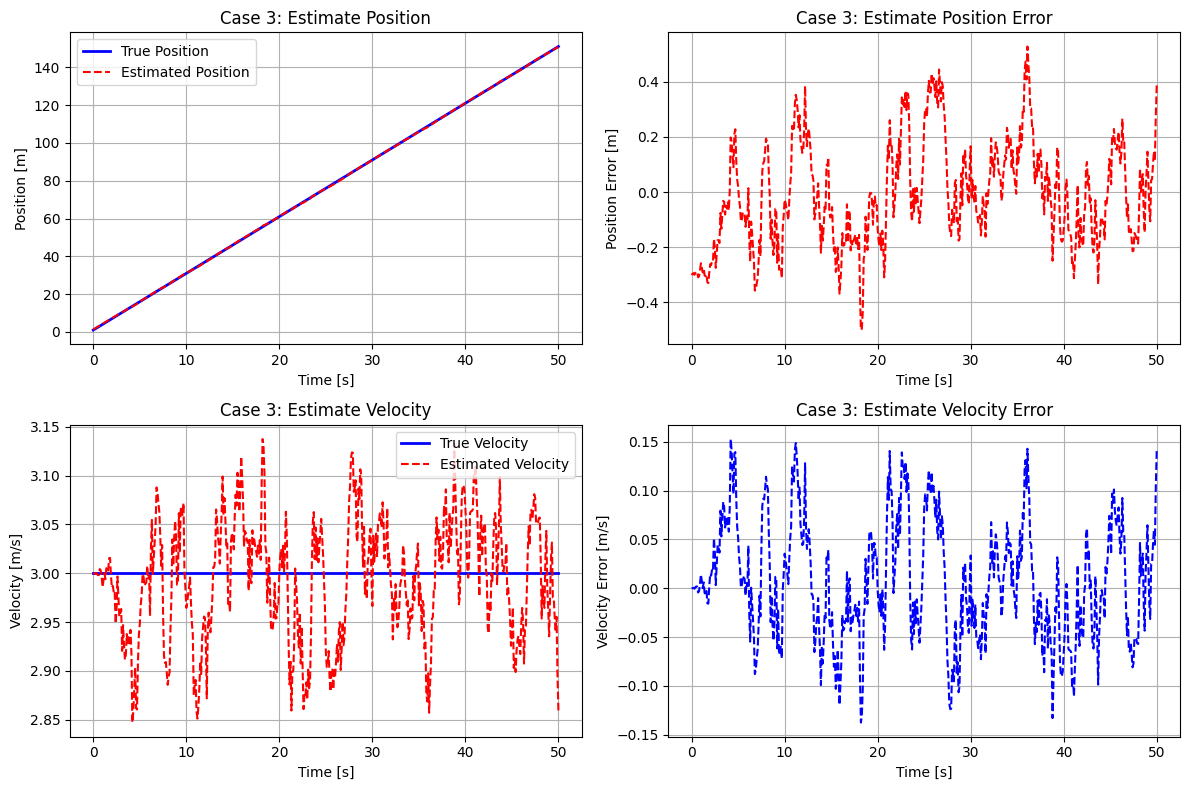

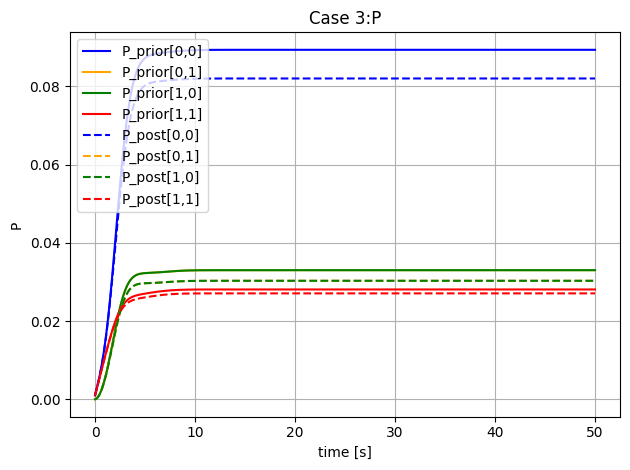

In [85]:
# Estimation Cases 1 to 3
cases_Q = [Q_case1, Q_case2, Q_case3]
cases_R = [R_case1, R_case2, R_case3]
cases_labels = ['Case 1', 'Case 2', 'Case 3']

for case_idx in range(3):
    Q = cases_Q[case_idx]
    R = cases_R[case_idx]
    label = cases_labels[case_idx]

##
    # Initialize state estimate and covariance
    # x_est = np.array([[0.5], [2]])  # initial state estimate # Test mode
    # P_est = np.array([
    #     [5, 0],
    #     [0, 5]
    # ])  # initial covariance estimate

    # x_est = np.array([[0], [0]])  # initial state estimate # case 4
    # P_est = np.array([
    #     [10000, 0],
    #     [0, 10000]
    # ])  # initial covariance estimate

    x_est = np.array([[1], [3]])  # initial state estimate # case 5
    P_est = np.array([
        [0, 0],
        [0, 0]
    ])  # initial covariance estimate
##

    # Store estimates for plotting
    l_estimates = np.zeros(time_steps)
    v_estimates = np.zeros(time_steps)
    err_estimated_position = np.zeros(time_steps)
    err_estimated_velocity = np.zeros(time_steps)
    
    # Store covariance matrix elements for plotting
    P_pred_00 = np.zeros(time_steps)
    P_pred_01 = np.zeros(time_steps)
    P_pred_10 = np.zeros(time_steps)
    P_pred_11 = np.zeros(time_steps)
    P_est_00 = np.zeros(time_steps)
    P_est_01 = np.zeros(time_steps)
    P_est_10 = np.zeros(time_steps)
    P_est_11 = np.zeros(time_steps)

    for t in range(time_steps):
        # Prediction step
        x_pred = A @ x_est  # Priori state estimate
        P_pred = A @ P_est @ A.T + Q  # Priori covariance estimate

        # Measurement update step
        H = np.array([[1, 0]])  # Measurement matrix
        y_meas = np.array([[y_t[t]]])  # Measurement at time t
        S = H @ P_pred @ H.T + R  # Innovation covariance
        K = P_pred @ H.T @ np.linalg.inv(S)  # Kalman gain
        y_pred = H @ x_pred  # Predicted measurement
        x_est = x_pred + K @ (y_meas - y_pred)  # Posteriori state estimate
        P_est = (np.eye(2) - K @ H) @ P_pred @ (np.eye(2) - K @ H).T + K @ R @ K.T  # Posteriori covariance estimate

        # Store state estimates
        l_estimates[t] = x_est[0]
        v_estimates[t] = x_est[1]
        err_estimated_position[t] = l_t[t] - l_estimates[t]
        err_estimated_velocity[t] = v_t[t] - v_estimates[t]
        
        # Store covariance matrix elements
        P_pred_00[t] = P_pred[0, 0]
        P_pred_01[t] = P_pred[0, 1]
        P_pred_10[t] = P_pred[1, 0]
        P_pred_11[t] = P_pred[1, 1]
        P_est_00[t] = P_est[0, 0]
        P_est_01[t] = P_est[0, 1]
        P_est_10[t] = P_est[1, 0]
        P_est_11[t] = P_est[1, 1]

    # Calculate RMSE
    rmse_position = np.sqrt(np.mean(err_estimated_position**2))
    rmse_velocity = np.sqrt(np.mean(err_estimated_velocity**2))
    print(f'{label} - RMSE Position: {rmse_position:.4f} m, RMSE Velocity: {rmse_velocity:.4f} m/s')

    # Create a new figure for each case - State estimation
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(time, l_t, label='True Position', color='blue', linewidth=2)
    plt.plot(time, l_estimates, label='Estimated Position', color='red', linestyle='--')
    plt.xlabel('Time [s]')
    plt.ylabel('Position [m]')
    plt.title(f'{label}: Estimate Position')
    plt.legend()
    plt.grid()
    
    plt.subplot(2, 2, 3)
    plt.plot(time, v_t, label='True Velocity', color='blue', linewidth=2)
    plt.plot(time, v_estimates, label='Estimated Velocity', color='red', linestyle='--')
    plt.xlabel('Time [s]')
    plt.ylabel('Velocity [m/s]')
    plt.title(f'{label}: Estimate Velocity')
    plt.legend()
    plt.grid()

    plt.subplot(2, 2, 2)
    plt.plot(time, err_estimated_position, color='red', linestyle='--')
    plt.xlabel('Time [s]')
    plt.ylabel('Position Error [m]')
    plt.title(f'{label}: Estimate Position Error')
    plt.grid()

    plt.subplot(2, 2, 4)
    plt.plot(time, err_estimated_velocity, color='blue', linestyle='--')
    plt.xlabel('Time [s]')
    plt.ylabel('Velocity Error [m/s]')
    plt.title(f'{label}: Estimate Velocity Error')
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    
    # Create a new figure for covariance matrix elements
    # plt.figure(figsize=(12, 6))

    plt.plot(time, P_pred_00, label='P_prior[0,0]', color='blue', linestyle='-')
    plt.plot(time, P_pred_01, label='P_prior[0,1]', color='orange', linestyle='-')
    plt.plot(time, P_pred_10, label='P_prior[1,0]', color='green', linestyle='-')
    plt.plot(time, P_pred_11, label='P_prior[1,1]', color='red', linestyle='-')
    plt.plot(time, P_est_00, label='P_post[0,0]', color='blue', linestyle='--')
    plt.plot(time, P_est_01, label='P_post[0,1]', color='orange', linestyle='--')
    plt.plot(time, P_est_10, label='P_post[1,0]', color='green', linestyle='--')
    plt.plot(time, P_est_11, label='P_post[1,1]', color='red', linestyle='--')
    plt.xlabel('time [s]')
    plt.ylabel('P')
    plt.title(f'{label}:P')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()
    
